In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# import scipy.stats as stats
# Load the datasets
olist_order_items = pd.read_csv('dataset/olist_order_items_dataset.csv')
olist_products = pd.read_csv('dataset/olist_products_dataset.csv')

In [2]:
# Perform the LEFT JOINS step by step

merged_df = pd.merge(
    olist_order_items, olist_products,
    on='product_id',
    how='left')

In [3]:
merged_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [4]:
product_translation = pd.read_csv('dataset/product_category_name_translation.csv')
product_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [5]:
product_translation.shape

(71, 2)

In [6]:
merged_df = pd.merge(
    merged_df, product_translation,
    left_on='product_category_name', right_on='product_category_name',
    how='left'
)

In [7]:
olist_orders = pd.read_csv('dataset/olist_orders_dataset.csv')
olist_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
merged_df = pd.merge(
    merged_df, olist_orders,
    on='order_id',
    how='left'
)

In [9]:
merged_df.tail()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_height_cm,product_width_cm,product_category_name_english,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,...,15.0,40.0,housewares,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,...,26.0,38.0,computers_accessories,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,...,24.0,19.0,sports_leisure,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,...,20.0,20.0,computers_accessories,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79,cama_mesa_banho,47.0,511.0,...,3.0,19.0,bed_bath_table,96d649da0cc4ff33bb408b199d4c7dcf,delivered,2018-06-09 17:00:18,2018-06-09 17:10:13,2018-06-11 14:11:00,2018-06-14 17:56:26,2018-06-28 00:00:00


In [10]:
olist_reviews = pd.read_csv('dataset/olist_order_reviews_dataset.csv')
olist_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,18-01-18 0:00,18-01-18 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,10-03-18 0:00,11-03-18 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,17-02-18 0:00,18-02-18 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,21-04-17 0:00,21-04-17 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,01-03-18 0:00,02-03-18 10:26


In [11]:
olist_reviews.drop(['review_comment_title','review_comment_message','review_answer_timestamp','review_creation_date'], axis= 1, inplace=True)
olist_reviews.head()

,review_id,order_id,review_score
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5


In [12]:
merged_df = pd.merge(
    merged_df, olist_reviews,
    on='order_id',
    how='left'
)

In [13]:
olist_payments = pd.read_csv('dataset/olist_order_payments_dataset.csv')
olist_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [14]:
merged_df = pd.merge(
    merged_df, olist_payments,
    on='order_id',
    how='left'
)
merged_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,97ca439bc427b48bc1cd7177abe71365,5.0,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,7b07bacd811c4117b742569b04ce3580,4.0,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,0c5b33dea94867d1ac402749e5438e8b,5.0,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,f4028d019cb58564807486a6aaf33817,4.0,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,940144190dcba6351888cafa43f3a3a5,5.0,1.0,credit_card,3.0,218.04


In [15]:
merged_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value'],
      dtype='object')

In [16]:
olist_customer = pd.read_csv('dataset/olist_customers_dataset.csv')
olist_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [17]:
merged_df = pd.merge(
    merged_df, olist_customer,
    on='customer_id',
    how='left'
)
merged_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,review_id,review_score,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,97ca439bc427b48bc1cd7177abe71365,5.0,1.0,credit_card,2.0,72.19,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,7b07bacd811c4117b742569b04ce3580,4.0,1.0,credit_card,3.0,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,0c5b33dea94867d1ac402749e5438e8b,5.0,1.0,credit_card,5.0,216.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,f4028d019cb58564807486a6aaf33817,4.0,1.0,credit_card,2.0,25.78,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,940144190dcba6351888cafa43f3a3a5,5.0,1.0,credit_card,3.0,218.04,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [18]:
olist_sellers = pd.read_csv('dataset/olist_sellers_dataset.csv')
olist_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [19]:
merged_df = pd.merge(
    merged_df, olist_sellers,
    on='seller_id',
    how='left'
)
merged_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,credit_card,2.0,72.19,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,credit_card,3.0,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,credit_card,5.0,216.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,credit_card,2.0,25.78,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,credit_card,3.0,218.04,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,87900,loanda,PR


In [20]:
merged_df.shape

(118310, 36)

In [21]:
merged_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'seller_zip_code_prefix',
       'seller_city', 'seller_state'],
      dtype='object')

In [22]:
print(merged_df.isnull().sum().sort_values(ascending= False))

order_delivered_customer_date    2588
product_category_name_english    1734
product_category_name            1709
product_description_lenght       1709
product_name_lenght              1709
product_photos_qty               1709
order_delivered_carrier_date     1254
review_id                         978
review_score                      978
product_weight_g                   20
product_length_cm                  20
product_height_cm                  20
product_width_cm                   20
order_approved_at                  15
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
order_item_id                       0
order_id                            0
seller_id                           0
product_id                          0
order_purchase_timestamp            0
order_status                        0
shipping_limit_date                 0
freight_value                       0
customer_id 

In [23]:
olist_geo= pd.read_csv('dataset/olist_geolocation_dataset.csv')
olist_geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [24]:
olist_geo.drop(['geolocation_lat','geolocation_lng'], axis= 1, inplace=True)
olist_geo.head()

,geolocation_zip_code_prefix,geolocation_city,geolocation_state
0,1037,sao paulo,SP
1,1046,sao paulo,SP
2,1046,sao paulo,SP
3,1041,sao paulo,SP
4,1035,sao paulo,SP


In [25]:
olist_geo.shape

(1000163, 3)

In [26]:
olist_geo.duplicated().value_counts()

True     975843
False     24320
Name: count, dtype: int64

In [27]:
olist_g =olist_geo.drop_duplicates()

In [28]:
olist_g.duplicated().value_counts()

False    24320
Name: count, dtype: int64

In [29]:
olist_g.head()

,geolocation_zip_code_prefix,geolocation_city,geolocation_state
0,1037,sao paulo,SP
1,1046,sao paulo,SP
3,1041,sao paulo,SP
4,1035,sao paulo,SP
5,1012,sao paulo,SP


In [30]:
olist_g = olist_g.rename(columns={
    'geolocation_zip_code_prefix': 'customer_zip_code_prefix'
    
})
olist_g.head()

,customer_zip_code_prefix,geolocation_city,geolocation_state
0,1037,sao paulo,SP
1,1046,sao paulo,SP
3,1041,sao paulo,SP
4,1035,sao paulo,SP
5,1012,sao paulo,SP


In [31]:
merged_df = pd.merge(
    merged_df, olist_g,
    on='customer_zip_code_prefix',
    how='left'
)
merged_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,geolocation_city,geolocation_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,...,72.19,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,27277,volta redonda,SP,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,pet_shop,56.0,239.0,...,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,3471,sao paulo,SP,santa fe do sul,SP
2,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,pet_shop,56.0,239.0,...,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,3471,sao paulo,SP,santa fÃ© do sul,SP
3,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,moveis_decoracao,59.0,695.0,...,216.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,37564,borda da mata,MG,parÃ¡ de minas,MG
4,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,moveis_decoracao,59.0,695.0,...,216.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,37564,borda da mata,MG,para de minas,MG


In [32]:
merged_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'geolocation_city', 'geolocation_state'],
      dtype='object')

In [33]:
merged_df['product_category_name']

0                     cool_stuff
1                       pet_shop
2                       pet_shop
3               moveis_decoracao
4               moveis_decoracao
                   ...          
152613     utilidades_domesticas
152614    informatica_acessorios
152615             esporte_lazer
152616    informatica_acessorios
152617           cama_mesa_banho
Name: product_category_name, Length: 152618, dtype: object

In [34]:
# merged_df.drop('product_category_name', axis = 1, inplace=True)

In [35]:
# Rename column to match SQL alias
merged_df = merged_df.rename(columns={
    'product_category_name_english': 'product_category_name_e',
    
})
merged_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,geolocation_city,geolocation_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,...,72.19,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,27277,volta redonda,SP,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,pet_shop,56.0,239.0,...,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,3471,sao paulo,SP,santa fe do sul,SP
2,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,pet_shop,56.0,239.0,...,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,3471,sao paulo,SP,santa fÃ© do sul,SP
3,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,moveis_decoracao,59.0,695.0,...,216.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,37564,borda da mata,MG,parÃ¡ de minas,MG
4,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,moveis_decoracao,59.0,695.0,...,216.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,37564,borda da mata,MG,para de minas,MG


In [36]:
merged_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_e', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'geolocation_city', 'geolocation_state'],
      dtype='object')

In [37]:
merged_df['product_category_name_e']

0                    cool_stuff
1                      pet_shop
2                      pet_shop
3               furniture_decor
4               furniture_decor
                  ...          
152613               housewares
152614    computers_accessories
152615           sports_leisure
152616    computers_accessories
152617           bed_bath_table
Name: product_category_name_e, Length: 152618, dtype: object

In [38]:
print(merged_df.isnull().sum().sort_values(ascending= False))


order_delivered_customer_date    3286
product_category_name_e          2210
product_name_lenght              2180
product_category_name            2180
product_photos_qty               2180
product_description_lenght       2180
order_delivered_carrier_date     1582
review_id                        1288
review_score                     1288
geolocation_state                 317
geolocation_city                  317
product_height_cm                  26
product_weight_g                   26
product_length_cm                  26
product_width_cm                   26
order_approved_at                  22
payment_value                       6
payment_installments                6
payment_sequential                  6
payment_type                        6
order_item_id                       0
order_id                            0
price                               0
shipping_limit_date                 0
seller_id                           0
product_id                          0
order_purcha

#### Dataset merged without cleaning
#### merged_df.to_csv('eCommerce_dataset.csv', index = False)

In [39]:
merged_df_org = merged_df.copy()
merged_df_org.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,geolocation_city,geolocation_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,...,72.19,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,27277,volta redonda,SP,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,pet_shop,56.0,239.0,...,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,3471,sao paulo,SP,santa fe do sul,SP
2,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,pet_shop,56.0,239.0,...,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,3471,sao paulo,SP,santa fÃ© do sul,SP
3,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,moveis_decoracao,59.0,695.0,...,216.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,37564,borda da mata,MG,parÃ¡ de minas,MG
4,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,moveis_decoracao,59.0,695.0,...,216.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,37564,borda da mata,MG,para de minas,MG


In [40]:
# merged_df_org.to_csv('eCommerce_dataset.csv', index = False)

#### Data without nulls

In [41]:
merged_df = merged_df.dropna()
merged_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,geolocation_city,geolocation_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,72.19,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,27277,volta redonda,SP,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,3471,sao paulo,SP,santa fe do sul,SP
2,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,3471,sao paulo,SP,santa fÃ© do sul,SP
3,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,216.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,37564,borda da mata,MG,parÃ¡ de minas,MG
4,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,216.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,37564,borda da mata,MG,para de minas,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152613,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,...,343.40,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,88303,itajai,SC,sÃ£o luÃ­s,MA
152614,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,...,386.53,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,1206,sao paulo,SP,curitiba,PR
152615,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,...,116.85,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,80610,curitiba,PR,sao paulo,SP
152616,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,...,64.71,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,4733,sao paulo,SP,vinhedo,SP


In [42]:
# merged_df.to_csv('eCommerce_dataset_cleaned.csv', index = False)

### Visualizations

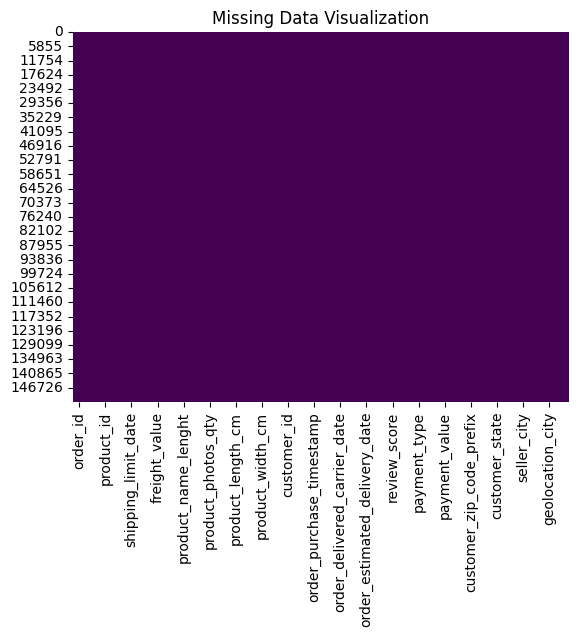

In [43]:
sns.heatmap(merged_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Visualization')
plt.show()

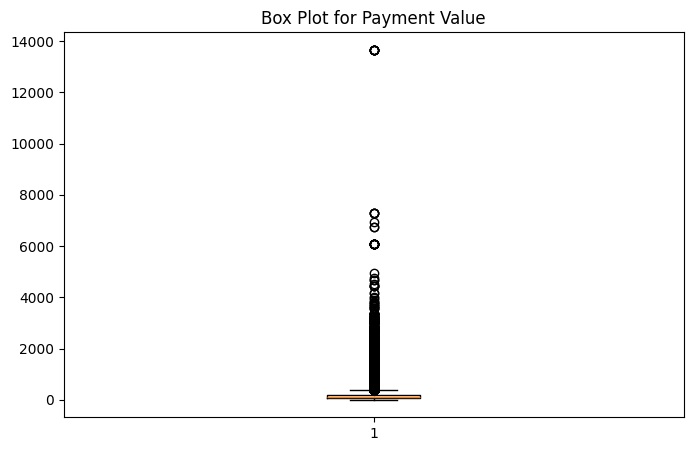

In [44]:

# Example: Check for outliers in 'payment_value'
plt.figure(figsize=(8, 5))
plt.boxplot(x=merged_df['payment_value'])
plt.title("Box Plot for Payment Value")
plt.show()


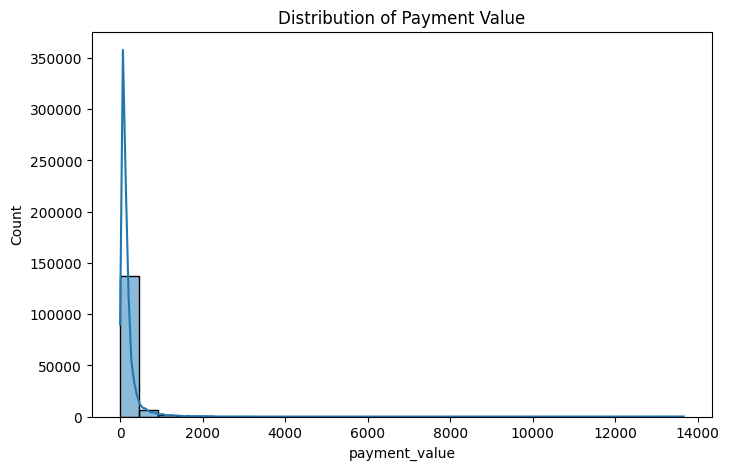

In [45]:
plt.figure(figsize=(8, 5))
sns.histplot(merged_df['payment_value'], bins=30, kde=True)
plt.title("Distribution of Payment Value")
plt.show()

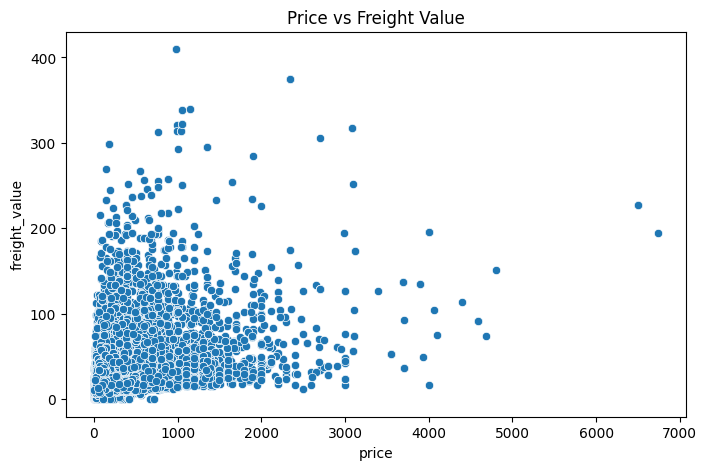

In [46]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=merged_df['price'], y=merged_df['freight_value'])
plt.title("Price vs Freight Value")
plt.show()


# Temporal Analysis

### Daily, Weekly, and Monthly Sales Patterns


Objective: Analyze daily, weekly, monthly sales, identify seasonal trends, and study delivery and payment patterns.
Columns Needed:
- __order_date__: To extract time-based features (day, week, month, year) for sales trends.
- __order_value__: To calculate total sales or revenue over time.
- __delivery_date__: To calculate delivery time patterns (e.g., delivery delay = delivery_date - order_date).
- __payment_type__: To study payment patterns over time (e.g., most common payment methods).
- __order_status__: Helps understand sales for only completed orders.
- __customer_id__: To aggregate orders by customer over time.

In [47]:
merged_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_e', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'geolocation_city', 'geolocation_state'],
      dtype='object')

### Select specific columns


In [48]:
# Select specific columns
Temporal_df = merged_df[[
    'order_purchase_timestamp',
    'payment_value',
    'order_delivered_customer_date',
    'payment_type',
    'order_status',
    'customer_id'
]]


In [49]:
Temporal_df.columns

Index(['order_purchase_timestamp', 'payment_value',
       'order_delivered_customer_date', 'payment_type', 'order_status',
       'customer_id'],
      dtype='object')

### Type cast and Extract the Year, Month, Day, Dayname

In [50]:
Temporal_df['order_purchase_timestamp'] = pd.to_datetime(Temporal_df['order_purchase_timestamp'], errors='coerce')
Temporal_df['order_delivered_customer_date'] = pd.to_datetime(Temporal_df['order_delivered_customer_date'], errors='coerce')

# Extract date-based features
Temporal_df['order_date'] = Temporal_df['order_purchase_timestamp'].dt.date
Temporal_df['year'] = Temporal_df['order_purchase_timestamp'].dt.year
Temporal_df['month'] = Temporal_df['order_purchase_timestamp'].dt.month
Temporal_df['day'] = Temporal_df['order_purchase_timestamp'].dt.day
Temporal_df['weekday'] = Temporal_df['order_purchase_timestamp'].dt.day_name()

# Verify the new columns
print(Temporal_df[['order_purchase_timestamp', 'order_date', 'year', 'month', 'day', 'weekday']].head())

  order_purchase_timestamp  order_date  year  month  day    weekday
0      2017-09-13 08:59:02  2017-09-13  2017      9   13  Wednesday
1      2017-04-26 10:53:06  2017-04-26  2017      4   26  Wednesday
2      2017-04-26 10:53:06  2017-04-26  2017      4   26  Wednesday
3      2018-01-14 14:33:31  2018-01-14  2018      1   14     Sunday
4      2018-01-14 14:33:31  2018-01-14  2018      1   14     Sunday


In [51]:
Temporal_df.head()

,order_purchase_timestamp,payment_value,order_delivered_customer_date,payment_type,order_status,customer_id,order_date,year,month,day,weekday
0,2017-09-13 08:59:02,72.19,2017-09-20 23:43:48,credit_card,delivered,3ce436f183e68e07877b285a838db11a,2017-09-13,2017,9,13,Wednesday
1,2017-04-26 10:53:06,259.83,2017-05-12 16:04:24,credit_card,delivered,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26,2017,4,26,Wednesday
2,2017-04-26 10:53:06,259.83,2017-05-12 16:04:24,credit_card,delivered,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26,2017,4,26,Wednesday
3,2018-01-14 14:33:31,216.87,2018-01-22 13:19:16,credit_card,delivered,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14,2018,1,14,Sunday
4,2018-01-14 14:33:31,216.87,2018-01-22 13:19:16,credit_card,delivered,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14,2018,1,14,Sunday


### Daily Sales


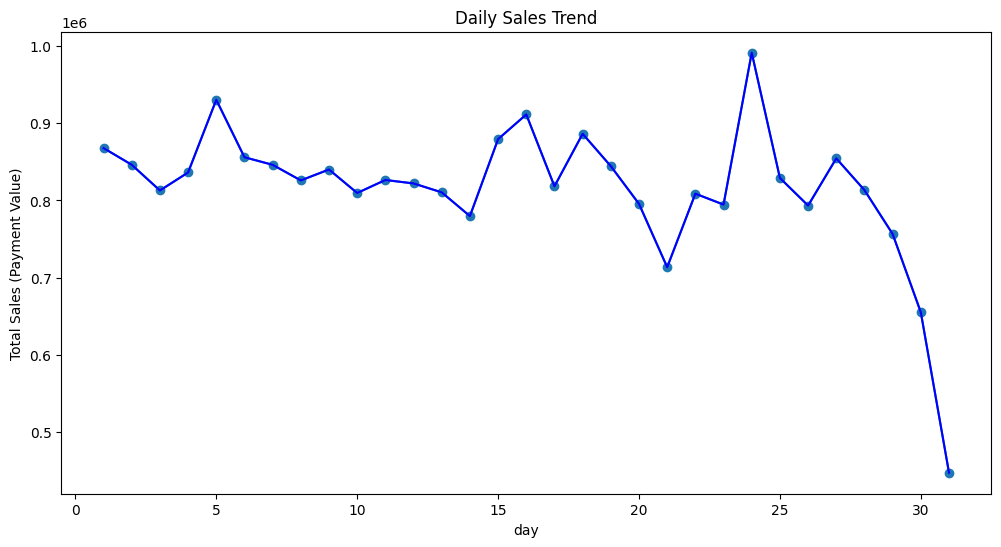

day
1     867704.62
2     846096.58
3     812844.65
4     836123.13
5     930187.84
6     855843.01
7     846061.57
8     825869.55
9     839968.71
10    809585.07
Name: payment_value, dtype: float64

In [52]:
# Group by order_date and sum the payment_value (or sales amount)
daily_sales = Temporal_df.groupby('day')['payment_value'].sum()

# Plot daily sales trend
plt.figure(figsize=(12, 6))
# plt.bar(daily_sales.index, daily_sales.values, color='blue')
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-')
daily_sales.plot(title='Daily Sales Trend', color='blue')
plt.xlabel('day')
plt.ylabel('Total Sales (Payment Value)')
plt.show()

daily_sales.head(10)


### Monthly Sales

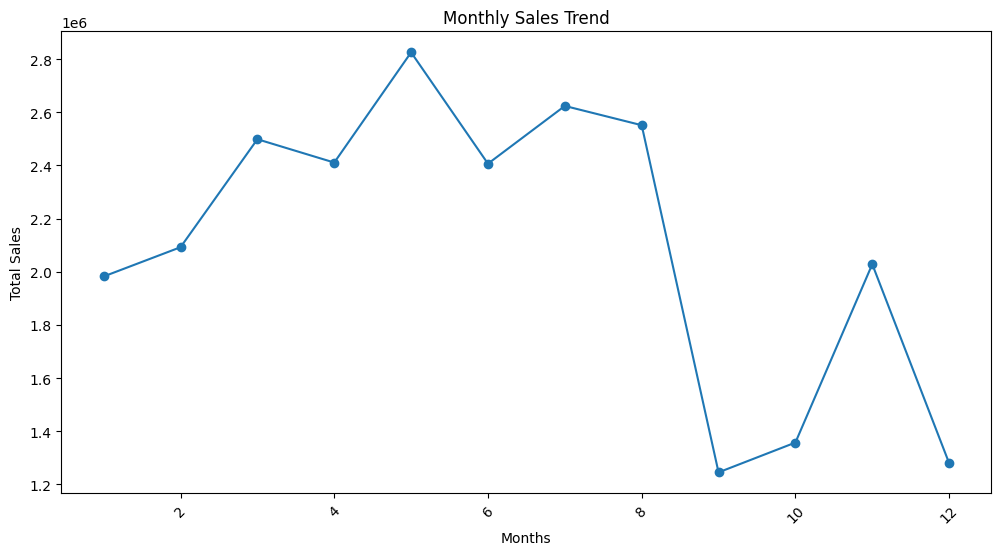

month
1     1982202.38
2     2092203.61
3     2498403.78
4     2410621.97
5     2825188.56
6     2406380.43
7     2623618.13
8     2551148.98
9     1245269.83
10    1357398.60
Name: payment_value, dtype: float64

In [53]:
# Group by year and month, then sum payment_value
monthly_sales = Temporal_df.groupby(['month'])['payment_value'].sum()

# Combine year and month for plotting
# monthly_sales['months'] = monthly_sales['year'].astype(str) + '-' + monthly_sales['month'].astype(str)
# monthly_sales['months'] = monthly_sales['month'].astype(str)

# Plot monthly sales trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')

# sns.barplot(data=monthly_sales, x='year_month', y='payment_value', hue='year_month', palette='viridis')
# monthly_sales.plot(title= 'monthly Sales trend',color='skyblue')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.xlabel('Months')
plt.ylabel('Total Sales')
plt.show()

monthly_sales.head(10)


In [54]:
Temporal_df.columns

Index(['order_purchase_timestamp', 'payment_value',
       'order_delivered_customer_date', 'payment_type', 'order_status',
       'customer_id', 'order_date', 'year', 'month', 'day', 'weekday'],
      dtype='object')

### Weekly Sales

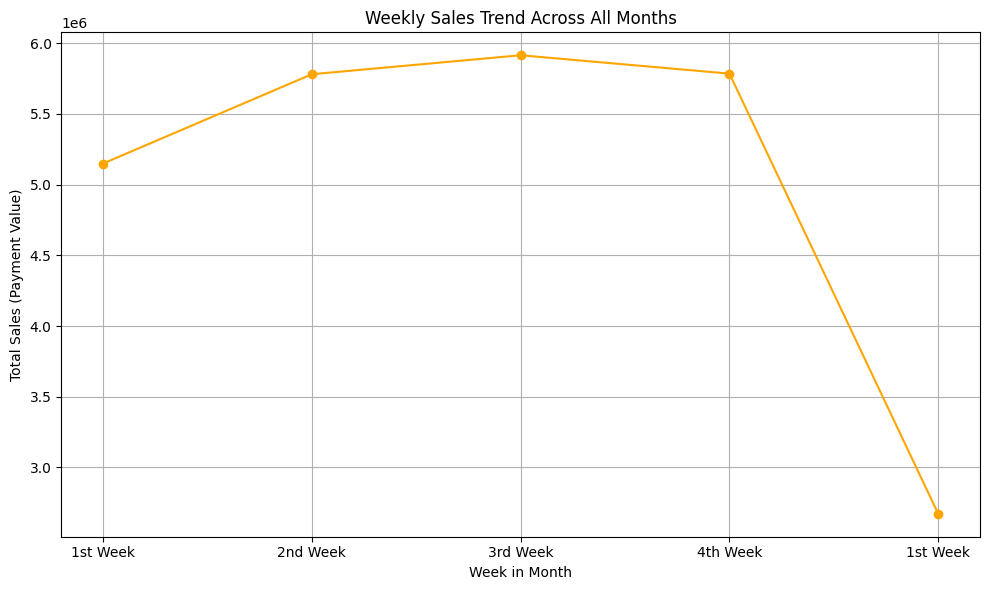

,week_in_month,payment_value
0,1,5148799.83
1,2,5780259.93
2,3,5914418.40
3,4,5784599.45
4,5,2672584.16


In [55]:

# week number within the month (week in the month is between 1 and 4 or 5)
Temporal_df['week_in_month'] = Temporal_df['order_purchase_timestamp'].dt.day // 7 + 1  # Week number in the month

# Filter only the first 4 or 5 weeks
valid_weeks = [1, 2, 3, 4, 5]
Temporal_df = Temporal_df[Temporal_df['week_in_month'].isin(valid_weeks)]

# Group by 'week_in_month' and calculate total payment_value for each week
weekly_sales_trend = Temporal_df.groupby('week_in_month')['payment_value'].sum().reset_index()

# Plot weekly sales trend across all months
plt.figure(figsize=(10, 6))
plt.plot(weekly_sales_trend['week_in_month'], weekly_sales_trend['payment_value'], marker='o', linestyle='-', color='orange')
plt.title('Weekly Sales Trend Across All Months')
plt.xlabel('Week in Month')
plt.ylabel('Total Sales (Payment Value)')
plt.xticks([1, 2, 3, 4, 5], ['1st Week', '2nd Week', '3rd Week', '4th Week', '1st Week'])
plt.grid()
plt.tight_layout()
plt.show()

weekly_sales_trend.head(10)


### Cleaned Dataset Cols

In [56]:
merged_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_e', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'geolocation_city', 'geolocation_state'],
      dtype='object')

# Customer Analysis -->


- Analyze customer geographic distribution
- Study purchase frequency patterns
- Examine customer spending habits
- Analyze the impact of reviews on future purchases

### Top 10 Customer Locations by Total Sales

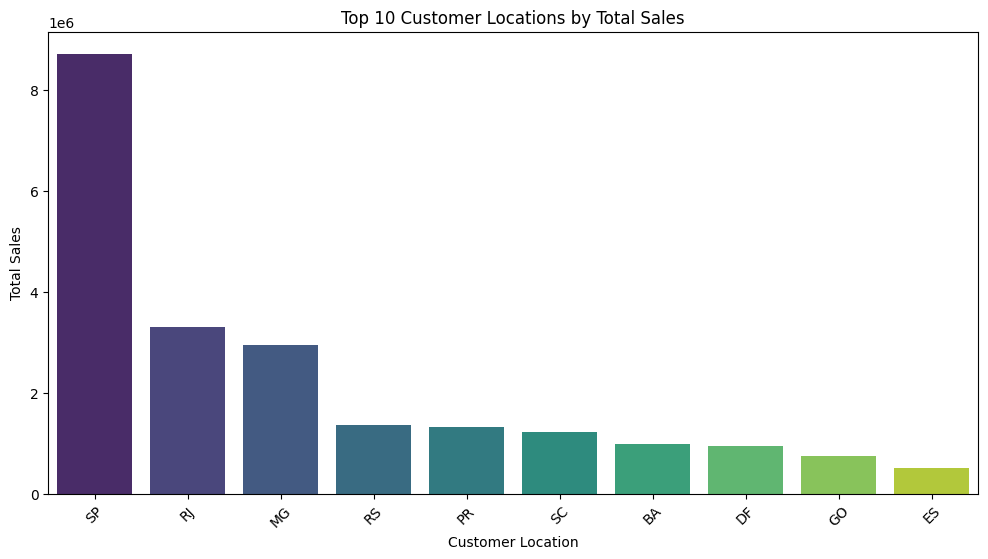

In [57]:
# Group data by customer location and calculate total sales
customer_geo_distribution = merged_df.groupby('customer_state')['payment_value'].sum().reset_index()

# Sort by total sales and take top 10 locations
top_locations = customer_geo_distribution.sort_values(by='payment_value', ascending=False).head(10)

# Plot geographic distribution
plt.figure(figsize=(12, 6))
sns.barplot(data=top_locations, x='customer_state', y='payment_value', palette='viridis')
plt.title('Top 10 Customer Locations by Total Sales')
plt.xticks(rotation=45)
plt.xlabel('Customer Location')
plt.ylabel('Total Sales')
plt.show()


### Customer Purchase Frequency Distribution

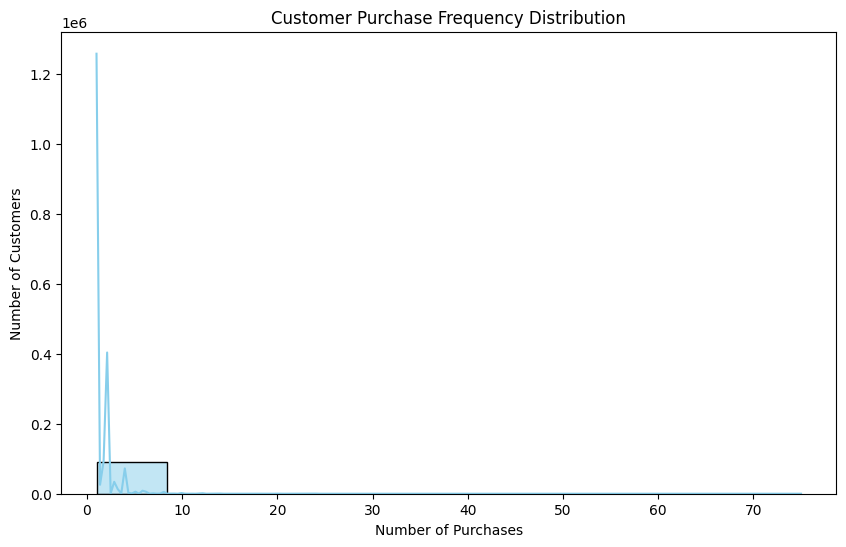

Top 10 Customers by Purchase Frequency:
                 customer_unique_id  purchase_count
0  9a736b248f67d166d2fbb006bcb877c3              75
1  69aedec762e21e5aaca6eba2e635dcfb              48
2  3ec83b54e0afb70def9480cd6b9097f7              45
3  2524dcec233c3766f2c2b22f69fd65f4              44
6  1bc3d5e384c365c86cf79078f32eb495              42
5  9620623f9ea546719cb3cd99bbb879a9              42
4  41a3b256cc497dc952a815b848345cbc              42
7  6fbc7cdadbb522125f4b27ae9dee4060              38
8  0f5ac8d5c31de21d2f25e24be15bbffb              36
9  f9ae226291893fda10af7965268fb7f6              35


In [58]:
# Count the number of purchases for each customer
purchase_frequency = merged_df['customer_unique_id'].value_counts().reset_index()
purchase_frequency.columns = ['customer_unique_id', 'purchase_count']
purchase_frequency = purchase_frequency.sort_values(by='purchase_count', ascending=False)

# Plot purchase frequency distribution
plt.figure(figsize=(10, 6))
sns.histplot(purchase_frequency['purchase_count'], bins=10, kde=True, color='skyblue')
plt.title('Customer Purchase Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()

# Top 10 customers with the most purchases
top_customers = purchase_frequency.head(10)
print("Top 10 Customers by Purchase Frequency:")
print(top_customers)


### Top 10 Customers by Total Spending

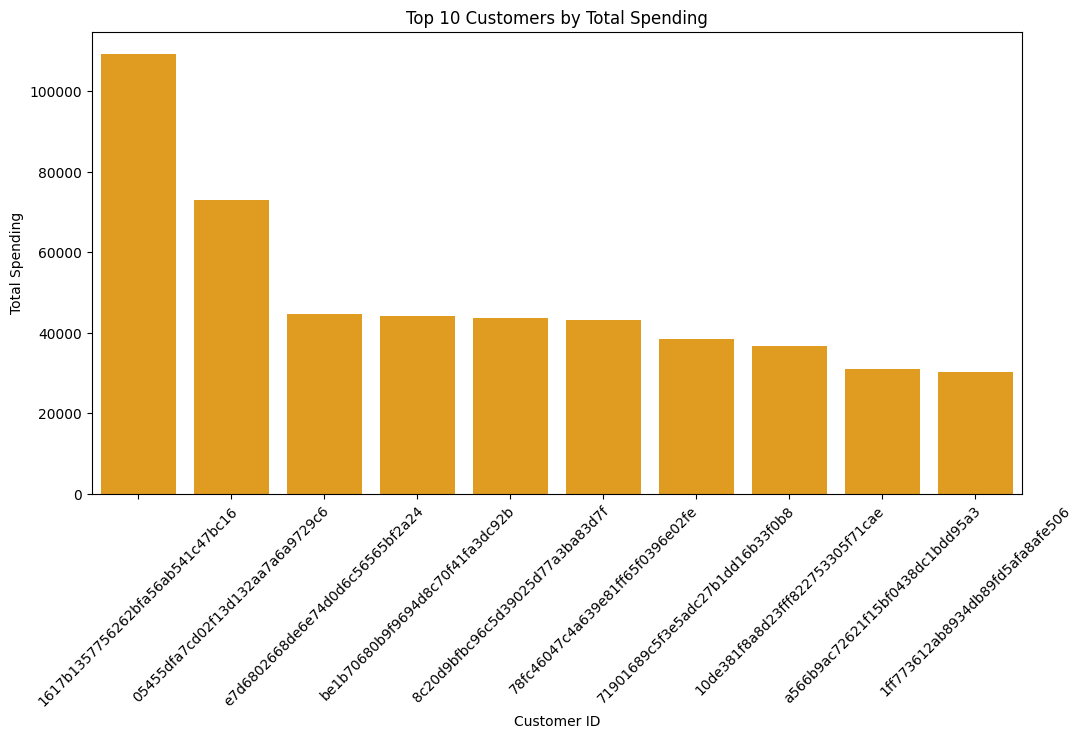

,customer_id,total_spending,avg_order_value
0,00012a2ce6f8dcda20d059ce98491703,114.74,114.74
1,000161a058600d5901f007fab4c27140,67.41,67.41
2,0001fd6190edaaf884bcaf3d49edf079,390.84,195.42
3,0002414f95344307404f0ace7a26f1d5,179.35,179.35
4,000379cdec625522490c315e70c7a9fb,107.01,107.01


In [59]:
# Calculate total and average spending per customer
customer_spending = Temporal_df.groupby('customer_id')['payment_value'].agg(['sum', 'mean']).reset_index()
customer_spending.columns = ['customer_id', 'total_spending', 'avg_order_value']

# Sort customers by total spending
top_spenders = customer_spending.sort_values(by='total_spending', ascending=False).head(10)

# Plot top 10 customers by total spending
plt.figure(figsize=(12, 6))
bars = sns.barplot(data=top_spenders, x='customer_id', y='total_spending', color='orange')

plt.title('Top 10 Customers by Total Spending')
plt.xticks(rotation=45)
plt.xlabel('Customer ID')
plt.ylabel('Total Spending')
plt.show()
customer_spending.head()


In [60]:
top_spenders.head()

,customer_id,total_spending,avg_order_value
8129,1617b1357756262bfa56ab541c47bc16,109312.64,13664.08
1970,05455dfa7cd02f13d132aa7a6a9729c6,72978.48,6081.54
85533,e7d6802668de6e74d0d6c56565bf2a24,44693.20,2234.66
70266,be1b70680b9f9694d8c70f41fa3dc92b,44048.00,2202.40
51506,8c20d9bfbc96c5d39025d77a3ba83d7f,43748.10,1988.55


### Impact of Review Scores on Average Spending

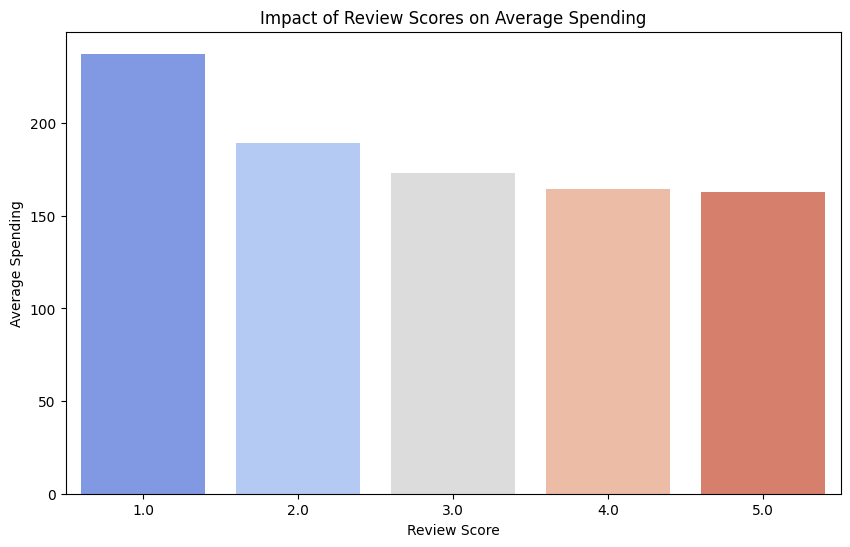

In [61]:
# Group data to calculate average payment_value per review score
review_impact = merged_df.groupby('review_score')['payment_value'].mean().reset_index()

# Plot the impact of review scores on spending
plt.figure(figsize=(10, 6))
sns.barplot(data=review_impact, x='review_score', y='payment_value', palette='coolwarm')
plt.title('Impact of Review Scores on Average Spending')
plt.xlabel('Review Score')
plt.ylabel('Average Spending')
plt.show()


# Product Analysis


- Identify top-selling products and categories
- Analyze price distributions
- Study product category relationships
- Examine product return rates


###  Identify Top-Selling Products and Categories

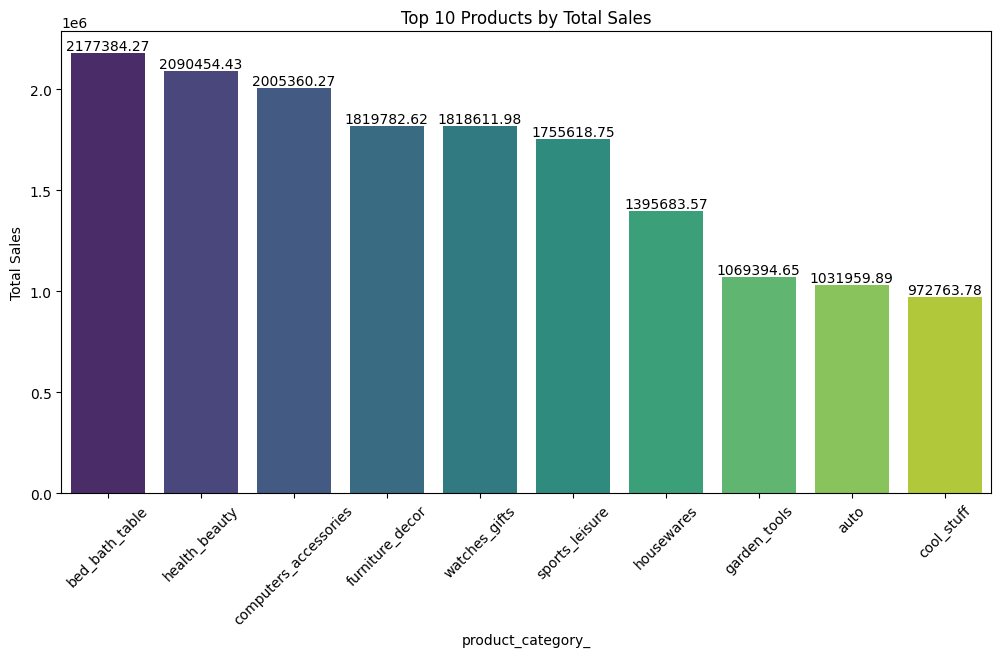

In [62]:
# Ensure required columns exist: 'product_id', 'category', 'payment_value', 'quantity'

# Top 10 products by sales
top_products = merged_df.groupby('product_category_name_e')['payment_value'].sum().reset_index()
top_products = top_products.sort_values(by='payment_value', ascending=False).head(10)

# Plot top 10 products
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='product_category_name_e', y='payment_value', palette='viridis')
for i, row in enumerate(top_products.itertuples()):
    plt.text(i, row.payment_value + 0.2, f'{row.payment_value}', ha='center', va='bottom', fontsize=10)
plt.title('Top 10 Products by Total Sales')
plt.xticks(rotation=45)
plt.xlabel('product_category_')
plt.ylabel('Total Sales')
plt.show()



In [63]:
top_products

,product_category_name_e,payment_value
7,bed_bath_table,2177384.27
43,health_beauty,2090454.43
15,computers_accessories,2005360.27
39,furniture_decor,1819782.62
70,watches_gifts,1818611.98
65,sports_leisure,1755618.75
49,housewares,1395683.57
42,garden_tools,1069394.65
5,auto,1031959.89
20,cool_stuff,972763.78


### Analyze Price Distributions

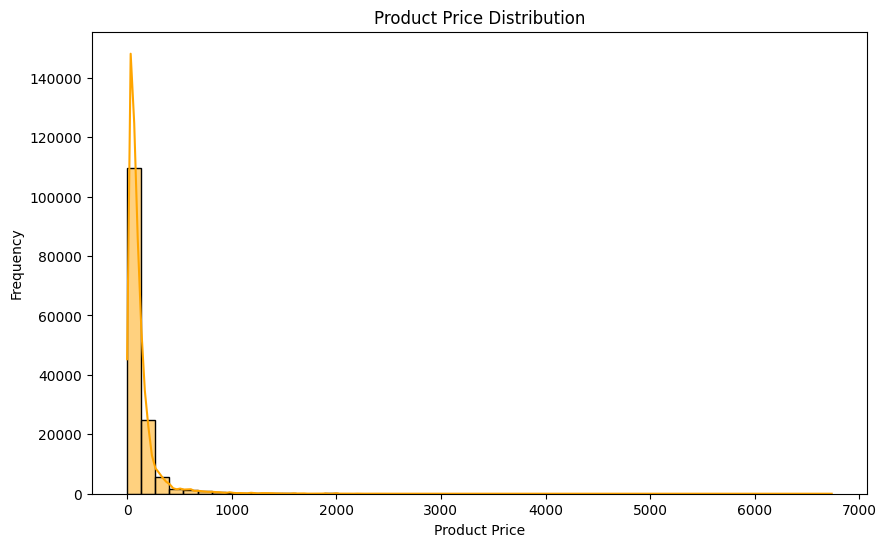

Product Price Summary:
count    145756.000000
mean        120.836779
std         182.478817
min           0.850000
25%          39.970000
50%          75.000000
75%         134.900000
max        6735.000000
Name: price, dtype: float64


In [64]:
# Ensure 'product_price' column exists

# Plot price distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['price'], bins=50, kde=True, color='orange')
plt.title('Product Price Distribution')
plt.xlabel('Product Price')
plt.ylabel('Frequency')
plt.show()

# Summary statistics for product prices
price_summary = merged_df['price'].describe()
print("Product Price Summary:")
print(price_summary)


### Study Product Category Relationships

In [65]:
# # Group by category and calculate total sales and average price
# category_analysis = merged_df.groupby('product_category_name_e').agg({
#     'payment_value': 'sum',
#     'price': 'mean'
# }).reset_index()

# category_analysis.columns = ['product_category_name_e', 'total_sales', 'avg_price']

# # Plot category vs total sales and average price
# fig, ax1 = plt.subplots(figsize=(12, 6))

# # # Total sales bar chart
# # sns.scatterplot(data=category_analysis, x='product_category_name_e', y='total_sales', ax=ax1, color='blue')
# # ax1.set_ylabel('Total Sales', color='blue')
# # ax1.tick_params(axis='y', labelcolor='blue')
# # ax1.set_xticklabels(category_analysis['product_category_name_e'], rotation=45)

# # Average price line chart
# ax2 = ax1.twinx()
# sns.lineplot(data=category_analysis, x='product_category_name_e', y='avg_price', ax=ax2, color='red', marker='o')
# ax2.set_ylabel('Average Price', color='red')
# ax2.tick_params(axis='y', labelcolor='red')

# plt.title('Product Category Relationships: Total Sales vs Average Price')
# plt.tight_layout()
# plt.show()


In [66]:
merged_df_org.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_e', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'geolocation_city', 'geolocation_state'],
      dtype='object')

### Product Return Rates

In [67]:
product_return_rate = merged_df_org.groupby('order_status')['order_status'].count().reset_index(name='status_count')
pd.DataFrame(product_return_rate)

,order_status,status_count
0,approved,3
1,canceled,694
2,delivered,149333
3,invoiced,477
4,processing,498
5,shipped,1605
6,unavailable,8


In [68]:
# Step 1: Calculate the total count of all statuses
total_count = product_return_rate['status_count'].sum()

# Step 2: Compute the percentage of each status
product_return_rate['status_rate'] = round((product_return_rate['status_count'] / total_count) * 100, 2)

# Step 3: Sort by 'status_count' in descending order
status_count = product_return_rate.sort_values(by='status_count', ascending=False).reset_index(drop=True)

# Display the result
print(status_count)


  order_status  status_count  status_rate
0    delivered        149333        97.85
1      shipped          1605         1.05
2     canceled           694         0.45
3   processing           498         0.33
4     invoiced           477         0.31
5  unavailable             8         0.01
6     approved             3         0.00


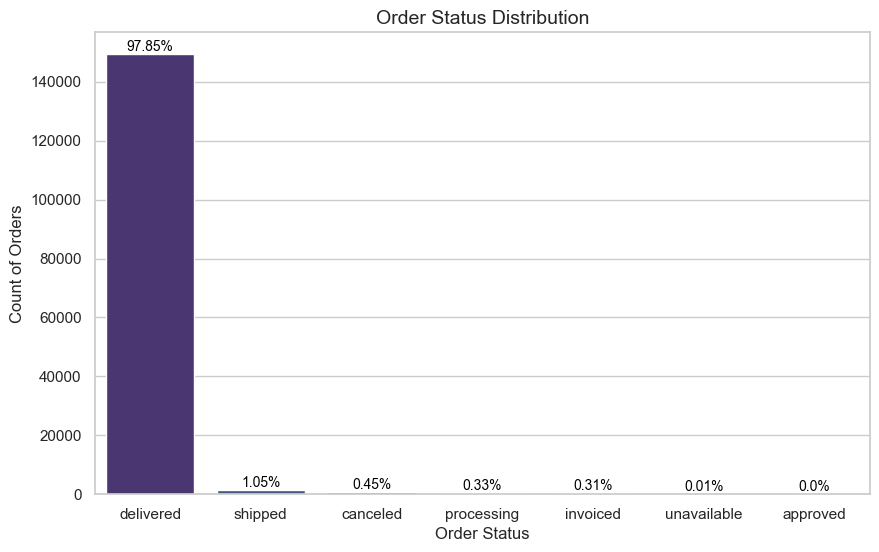

In [69]:
# Set the style for better visuals
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='order_status', y='status_count', data=status_count, palette='viridis')

# Add text annotations for percentages
for i, row in enumerate(status_count.itertuples()):
    plt.text(i, row.status_count + 0.2, f"{row.status_rate}%", ha='center', va='bottom', fontsize=10, color='black')

# Set plot labels and title
plt.title('Order Status Distribution', fontsize=14)
plt.xlabel('Order Status', fontsize=12)
plt.ylabel('Count of Orders', fontsize=12)

# Show the plot
plt.show()
